In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import os
import sys
from PIL import Image
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import keras
import tensorflow as tf
import cv2
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.metrics import classification_report,confusion_matrix
from keras.models import Model as KerasModel
from keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU
from tensorflow.keras.optimizers import Adam

In [2]:
directory = os.path.join('./data/face_extraction_mtcnn')

img_height = 256
img_width = 256
batch_size = 32
nb_epochs = 100

train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    directory,
    follow_links=True,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    directory, # same directory as training data
    follow_links=True,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data

Found 1586 images belonging to 2 classes.
Found 396 images belonging to 2 classes.


In [3]:
learning_rate = 0.001

x = Input(shape = (img_width, img_height, 3))

x1 = Conv2D(8, (3, 3), padding='same', activation = 'relu')(x)
x1 = BatchNormalization()(x1)
x1 = MaxPooling2D(pool_size=(2, 2), padding='same')(x1)

x2 = Conv2D(8, (5, 5), padding='same', activation = 'relu')(x1)
x2 = BatchNormalization()(x2)
x2 = MaxPooling2D(pool_size=(2, 2), padding='same')(x2)

x3 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x2)
x3 = BatchNormalization()(x3)
x3 = MaxPooling2D(pool_size=(2, 2), padding='same')(x3)

x4 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x3)
x4 = BatchNormalization()(x4)
x4 = MaxPooling2D(pool_size=(4, 4), padding='same')(x4)

y = Flatten()(x4)
y = Dropout(0.5)(y)
y = Dense(16)(y)
y = LeakyReLU(alpha=0.1)(y)
y = Dropout(0.5)(y)
y = Dense(1, activation = 'sigmoid')(y)

model =  KerasModel(inputs = x, outputs = y)

optimizer = Adam(learning_rate = learning_rate)
model.compile(optimizer = optimizer, loss = 'mean_squared_error', metrics = ['accuracy'])

In [4]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = nb_epochs)

Epoch 1/100
49/49 [==============================] - 877s 16s/step - loss: 0.3295 - accuracy: 0.5367 - val_loss: 0.2797 - val_accuracy: 0.5026
Epoch 2/100
49/49 [==============================] - 797s 16s/step - loss: 0.2740 - accuracy: 0.5817 - val_loss: 0.3965 - val_accuracy: 0.4948
Epoch 3/100
49/49 [==============================] - 1044s 21s/step - loss: 0.2498 - accuracy: 0.6178 - val_loss: 0.4014 - val_accuracy: 0.5052
Epoch 4/100
49/49 [==============================] - 1049s 21s/step - loss: 0.2367 - accuracy: 0.6371 - val_loss: 0.4046 - val_accuracy: 0.5000
Epoch 5/100
49/49 [==============================] - 1059s 21s/step - loss: 0.2352 - accuracy: 0.6486 - val_loss: 0.4013 - val_accuracy: 0.4870
Epoch 6/100
49/49 [==============================] - 1030s 21s/step - loss: 0.2320 - accuracy: 0.6577 - val_loss: 0.3802 - val_accuracy: 0.5078
Epoch 7/100
49/49 [==============================] - 1004s 20s/step - loss: 0.2236 - accuracy: 0.6654 - val_loss: 0.3989 - val_accuracy: 0

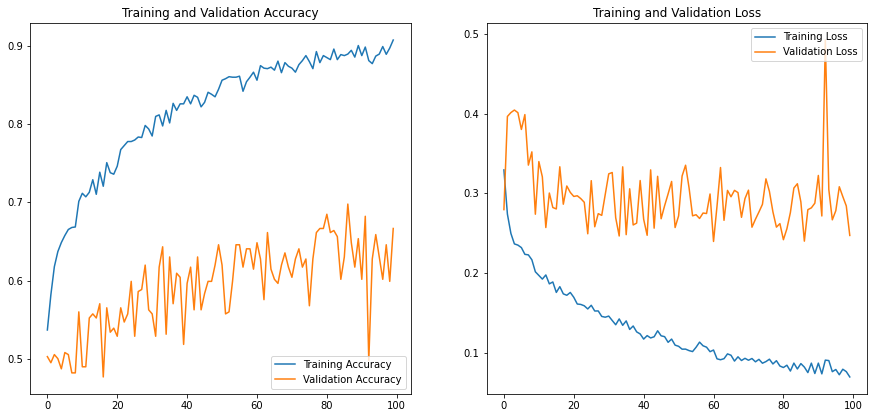

In [5]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(nb_epochs)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [6]:
df = pd.DataFrame()
for idx, key in enumerate(history.history.keys()):
    row = pd.DataFrame(data={
      'item': key,
      'max': max(history.history[key]),
      'mean': np.mean(history.history[key]),
      'min': min(history.history[key]),
    }, index=[idx])
    df = pd.concat([df,row])

from IPython.display import HTML
df.sort_values(by=['item'],ascending=True)
HTML(df.to_html(index=False))


Max accuracy test: 0.907979428768158
Max accuracy test epoch: 99
Mean accuracy test: 0.8179972761869431
Max accuracy validation: 0.6979166865348816
Max accuracy validation epoch: 86
Mean accuracy validation: 0.5923177084326744
Max loss test: 0.32946866750717163
Max loss test epoch: 0
Mean loss test: 0.1287222520262003
Max loss validation: 0.4924186170101166
